

1. Обучить, нейронную сеть на Keras на датасете MNIST.

In [1]:
!pip install scikeras[tensorflow]

In [2]:
!pip install mnist

In [3]:
import numpy as np
import pandas as pd
import mnist
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
from scikeras.wrappers import KerasClassifier

### Building model for digit recognition

In [5]:
#import images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

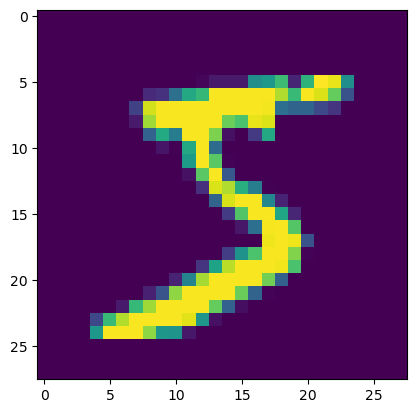

In [6]:
import matplotlib.pyplot as plt
plt.imshow(mnist.train_images()[0]/255)
mnist.train_images()[1]/255
to_categorical(train_labels)
#train_labels

In [7]:
input_shape = (28, 28, 1)

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [11]:
model_2 = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(90, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [12]:
model_2.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=500, epochs=10)

Epoch 1/10
120/120 [==============================] - 2s 4ms/step - loss: 0.5798 - accuracy: 0.8429
Epoch 2/10
120/120 [==============================] - 1s 4ms/step - loss: 0.2427 - accuracy: 0.9305
Epoch 3/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1834 - accuracy: 0.9475
Epoch 4/10
120/120 [==============================] - 1s 4ms/step - loss: 0.1475 - accuracy: 0.9564
Epoch 5/10
120/120 [==============================] - 1s 4ms/step - loss: 0.1222 - accuracy: 0.9640
Epoch 6/10
120/120 [==============================] - 1s 4ms/step - loss: 0.1052 - accuracy: 0.9690
Epoch 7/10
120/120 [==============================] - 1s 4ms/step - loss: 0.0909 - accuracy: 0.9730
Epoch 8/10
120/120 [==============================] - 1s 4ms/step - loss: 0.0798 - accuracy: 0.9767
Epoch 9/10
120/120 [==============================] - 1s 4ms/step - loss: 0.0711 - accuracy: 0.9792
Epoch 10/10
120/120 [==============================] - 1s 4ms/step - loss: 0.0640 - accuracy: 0.9813

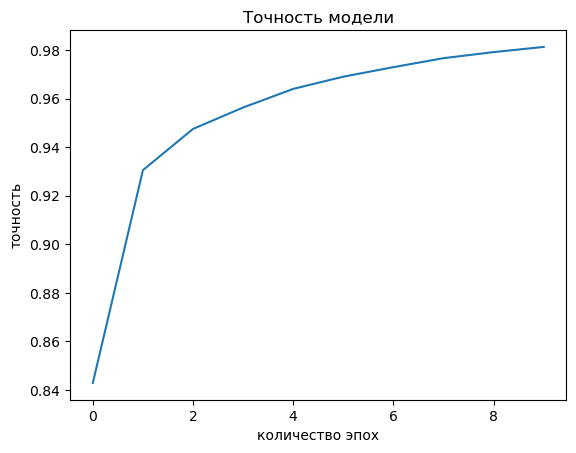

In [14]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

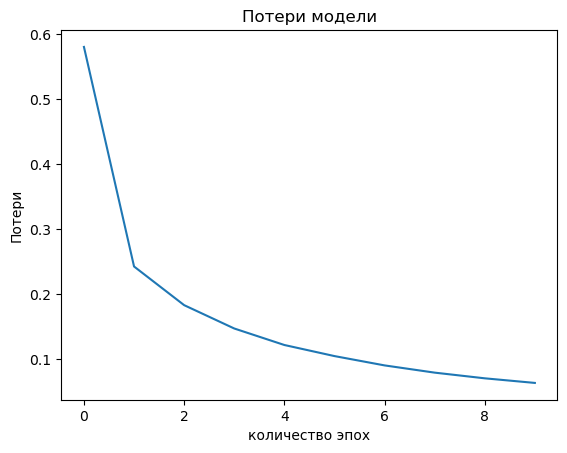

In [15]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [16]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0879 - accuracy: 0.9738


[0.08791197091341019, 0.973800003528595]

In [17]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0826 - accuracy: 0.9742 - val_loss: 0.0992 - val_accuracy: 0.9728
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0702 - accuracy: 0.9792 - val_loss: 0.1067 - val_accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9825 - val_loss: 0.1052 - val_accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.0974 - val_accuracy: 0.9741
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9866 - val_loss: 0.1239 - val_accuracy: 0.9686
Wall time: 20.8 s


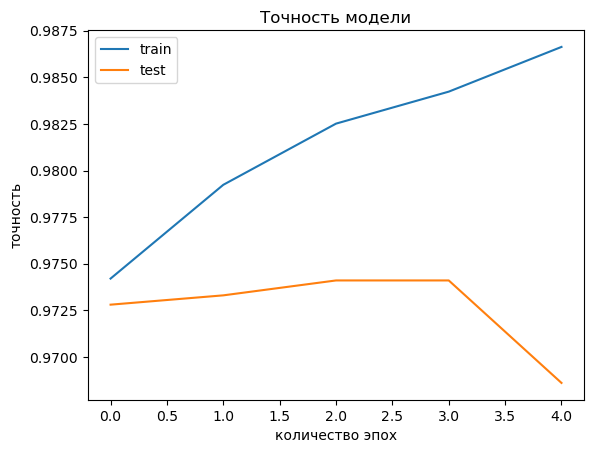

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

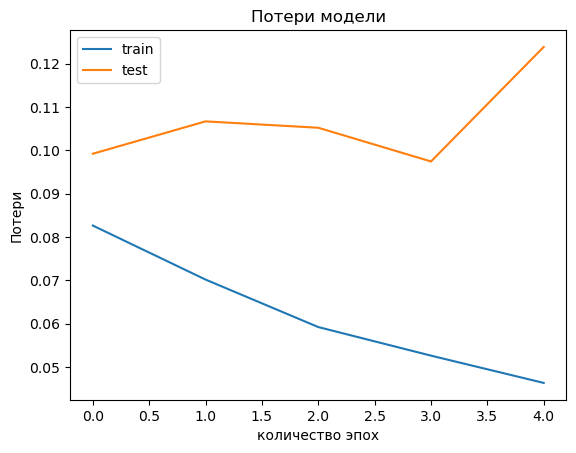

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

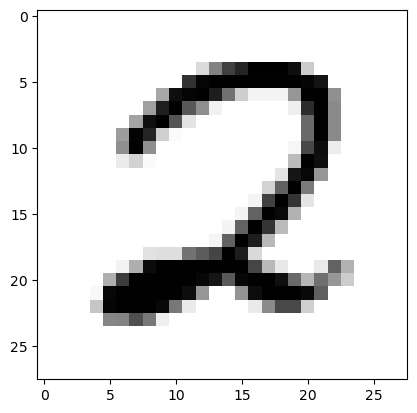

1/1 [==============================] - 0s 277ms/step
1: 2


In [20]:
n_rec=35
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("1:", prediction)

In [21]:
# Построение модели: изменил оптимизатор, изменил размеры слоев.
def create_model(optimizer='RMSprop'):
    model = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Компиляция модели.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [22]:
model = create_model()

# Обучение модели.
model.fit(train_images, to_categorical(train_labels), epochs=7, batch_size=128, validation_split=0.2)

# Тренировка модели.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/7
375/375 [==============================] - 2s 4ms/step - loss: 0.3501 - accuracy: 0.9014 - val_loss: 0.1841 - val_accuracy: 0.9477
Epoch 2/7
375/375 [==============================] - 1s 3ms/step - loss: 0.1525 - accuracy: 0.9553 - val_loss: 0.1283 - val_accuracy: 0.9644
Epoch 3/7
375/375 [==============================] - 1s 3ms/step - loss: 0.1075 - accuracy: 0.9681 - val_loss: 0.1144 - val_accuracy: 0.9657
Epoch 4/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.9751 - val_loss: 0.1093 - val_accuracy: 0.9674
Epoch 5/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0657 - accuracy: 0.9804 - val_loss: 0.0946 - val_accuracy: 0.9711
Epoch 6/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.0947 - val_accuracy: 0.9745
Epoch 7/7
313/313 [==============================] - 1s 1ms/step - loss: 0.0786 - accuracy: 0.9756
**************
Loss - 0.08, Metrics - 0.976


In [23]:
# Прогноз по первым 10 тестовым изображениям.
predictions = model.predict(test_images[:20])

# Вывод прогноза по нашей модели.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Сверка наших прогнозов с основными фактами.
print(f'True labels: {test_labels[:20]}')

1/1 [==============================] - 0s 189ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
True labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


### Picking params via GridSearchCV

In [24]:
# Выбор параметров с помощью GridSearchCV: экспериментирую с количеством эпох, с размерами партий и беру два оптимизатора

batch_size = [70, 80, 90]
epochs = [18, 25]
optimizer = ['RMSprop', 'Adam']

In [25]:
model = KerasClassifier(create_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/18
572/572 [==============================] - 2s 2ms/step - loss: 0.3306 - accuracy: 0.9051
Epoch 2/18
572/572 [==============================] - 1s 2ms/step - loss: 0.1473 - accuracy: 0.9563
Epoch 3/18
572/572 [==============================] - 1s 2ms/step - loss: 0.1028 - accuracy: 0.9686
Epoch 4/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9771
Epoch 5/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0610 - accuracy: 0.9816
Epoch 6/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9847
Epoch 7/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0380 - accuracy: 0.9887
Epoch 8/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0314 - accuracy: 0.9905
Epoch 9/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 10/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0208 - accuracy: 0.9933

572/572 [==============================] - 1s 2ms/step - loss: 0.0287 - accuracy: 0.9916
Epoch 9/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 10/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0193 - accuracy: 0.9938
Epoch 11/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0169 - accuracy: 0.9949
Epoch 12/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0127 - accuracy: 0.9960
Epoch 13/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0109 - accuracy: 0.9970
Epoch 14/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 15/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 0.9975
Epoch 16/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9982
Epoch 17/18
572/572 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9986
Epo

572/572 [==============================] - 2s 2ms/step - loss: 0.3224 - accuracy: 0.9083
Epoch 2/25
572/572 [==============================] - 1s 2ms/step - loss: 0.1399 - accuracy: 0.9574
Epoch 3/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0947 - accuracy: 0.9714
Epoch 4/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9786
Epoch 5/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0557 - accuracy: 0.9832
Epoch 6/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0439 - accuracy: 0.9862
Epoch 7/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0350 - accuracy: 0.9890
Epoch 8/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 9/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.9933
Epoch 10/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0177 - accuracy: 0.9946
Epoch 11/2

572/572 [==============================] - 1s 2ms/step - loss: 0.0552 - accuracy: 0.9834
Epoch 6/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0438 - accuracy: 0.9865
Epoch 7/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0341 - accuracy: 0.9896
Epoch 8/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0286 - accuracy: 0.9913
Epoch 9/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 10/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0193 - accuracy: 0.9942
Epoch 11/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0146 - accuracy: 0.9955
Epoch 12/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 13/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0101 - accuracy: 0.9970
Epoch 14/25
572/572 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.9976
Epoch 

500/500 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.9814
Epoch 6/18
500/500 [==============================] - 1s 2ms/step - loss: 0.0476 - accuracy: 0.9849
Epoch 7/18
500/500 [==============================] - 1s 2ms/step - loss: 0.0391 - accuracy: 0.9876
Epoch 8/18
500/500 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9899
Epoch 9/18
500/500 [==============================] - 1s 2ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 10/18
500/500 [==============================] - 1s 2ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 11/18
500/500 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 0.9948
Epoch 12/18
500/500 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.9962
Epoch 13/18
500/500 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 14/18
500/500 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 0.9967
Epoch 

500/500 [==============================] - 1s 2ms/step - loss: 0.0587 - accuracy: 0.9823
Epoch 6/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0472 - accuracy: 0.9851
Epoch 7/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9882
Epoch 8/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0301 - accuracy: 0.9905
Epoch 9/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 10/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0199 - accuracy: 0.9939
Epoch 11/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0166 - accuracy: 0.9952
Epoch 12/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9958
Epoch 13/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0113 - accuracy: 0.9965
Epoch 14/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0089 - accuracy: 0.9973
Epoch 

500/500 [==============================] - 1s 2ms/step - loss: 0.0251 - accuracy: 0.9924
Epoch 10/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0213 - accuracy: 0.9938
Epoch 11/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0187 - accuracy: 0.9941
Epoch 12/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9958
Epoch 13/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0123 - accuracy: 0.9962
Epoch 14/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 0.9971
Epoch 15/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0086 - accuracy: 0.9973
Epoch 16/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0064 - accuracy: 0.9983
Epoch 17/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 18/25
500/500 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9987
Ep

445/445 [==============================] - 1s 2ms/step - loss: 0.1461 - accuracy: 0.9549
Epoch 3/18
445/445 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9691
Epoch 4/18
445/445 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9772
Epoch 5/18
445/445 [==============================] - 1s 2ms/step - loss: 0.0570 - accuracy: 0.9822
Epoch 6/18
445/445 [==============================] - 1s 2ms/step - loss: 0.0452 - accuracy: 0.9861
Epoch 7/18
445/445 [==============================] - 1s 2ms/step - loss: 0.0378 - accuracy: 0.9880
Epoch 8/18
445/445 [==============================] - 1s 2ms/step - loss: 0.0295 - accuracy: 0.9908
Epoch 9/18
445/445 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9923
Epoch 10/18
445/445 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 11/18
445/445 [==============================] - 1s 2ms/step - loss: 0.0160 - accuracy: 0.9951
Epoch 12/

445/445 [==============================] - 1s 2ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 10/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0244 - accuracy: 0.9927
Epoch 11/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0208 - accuracy: 0.9937
Epoch 12/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 13/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.9959
Epoch 14/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9965
Epoch 15/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0092 - accuracy: 0.9974
Epoch 16/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9973
Epoch 17/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0067 - accuracy: 0.9980
Epoch 18/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9985
Ep

445/445 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.9959
Epoch 14/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9967
Epoch 15/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0094 - accuracy: 0.9973
Epoch 16/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.9975
Epoch 17/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9978
Epoch 18/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9982
Epoch 19/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 20/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9987
Epoch 21/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0036 - accuracy: 0.9987
Epoch 22/25
445/445 [==============================] - 1s 2ms/step - loss: 0.0030 - accuracy: 0.9991
Ep

In [26]:
print(grid_result.best_score_, grid_result.best_params_)

0.9758 {'batch_size': 70, 'epochs': 25, 'optimizer': 'Adam'}


In [27]:
df = pd.DataFrame(grid_result.cv_results_)

In [28]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

,param_batch_size,param_epochs,param_optimizer,mean_test_score
3,70,25,Adam,0.975800
2,70,25,RMSprop,0.975533
10,90,25,RMSprop,0.975300
11,90,25,Adam,0.974950
7,80,25,Adam,0.974933
8,90,18,RMSprop,0.974867
6,80,25,RMSprop,0.974750
1,70,18,Adam,0.974317
0,70,18,RMSprop,0.974000
5,80,18,Adam,0.973217
